In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('SongAudioDataPlayCounts.csv').set_index('Song Info')

In [4]:
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Play Count
Song Info,,,,,,,,,,
"Bedrock Anthem by ""Weird Al"" Yankovic",0.700,0.913,-8.156,0.1510,0.05910,0.000001,0.154,0.653,93.037,31
"Canadian Idiot (Parody of ""American Idiot"" by Green Day) by ""Weird Al"" Yankovic",0.543,0.697,-9.211,0.0612,0.00206,0.000002,0.343,0.861,185.978,12
"Ebay (Parody of ""I Want It That Way"" by the Backstreet Boys) by ""Weird Al"" Yankovic",0.759,0.552,-9.536,0.0322,0.50500,0.000000,0.165,0.436,101.321,11
"Hardware Store by ""Weird Al"" Yankovic",0.707,0.867,-12.443,0.0703,0.18500,0.000338,0.329,0.684,126.138,10
155 by +44,0.462,0.936,-3.604,0.0429,0.00173,0.000037,0.373,0.546,155.017,25


# EDA

I mainly want to use this notebook to look at the individual audio analysis features to see if there are any features that may hurt the cluster model.

Danceability: From 0 to 1. How "easy" it is to dance to a song.

Energy: 0 to 1. Represents a perceptual measure of intensity and activity. Higher ---> more energy

Loudness: Overall loudness of a track in dB. Typically between -60 and 0 dB.

Speechiness: 0 to 1. Detects the amount of speech compared to the amount of singing. Higher ---> more speech.

Acousticness: 0 to 1. Measures how acoustic vs. electric. Higher is more acoustic.

Instrumentalness: 0 to 1. The higher, the more likely it is instrumental (no vocals)

Liveness: 0 to 1. Higher means the track is more likely to be recorded live.

Valence: 0 to 1. Positiveness conveyed by a song. The higher the score, the more positive (happy, etc) it is.

Tempo: The quickness of a song. The higher, the more fast-paced.

Play Count: Amount of times played in my streaming data (no need to analyze this. I want to use it as a weight when performing the clustering).

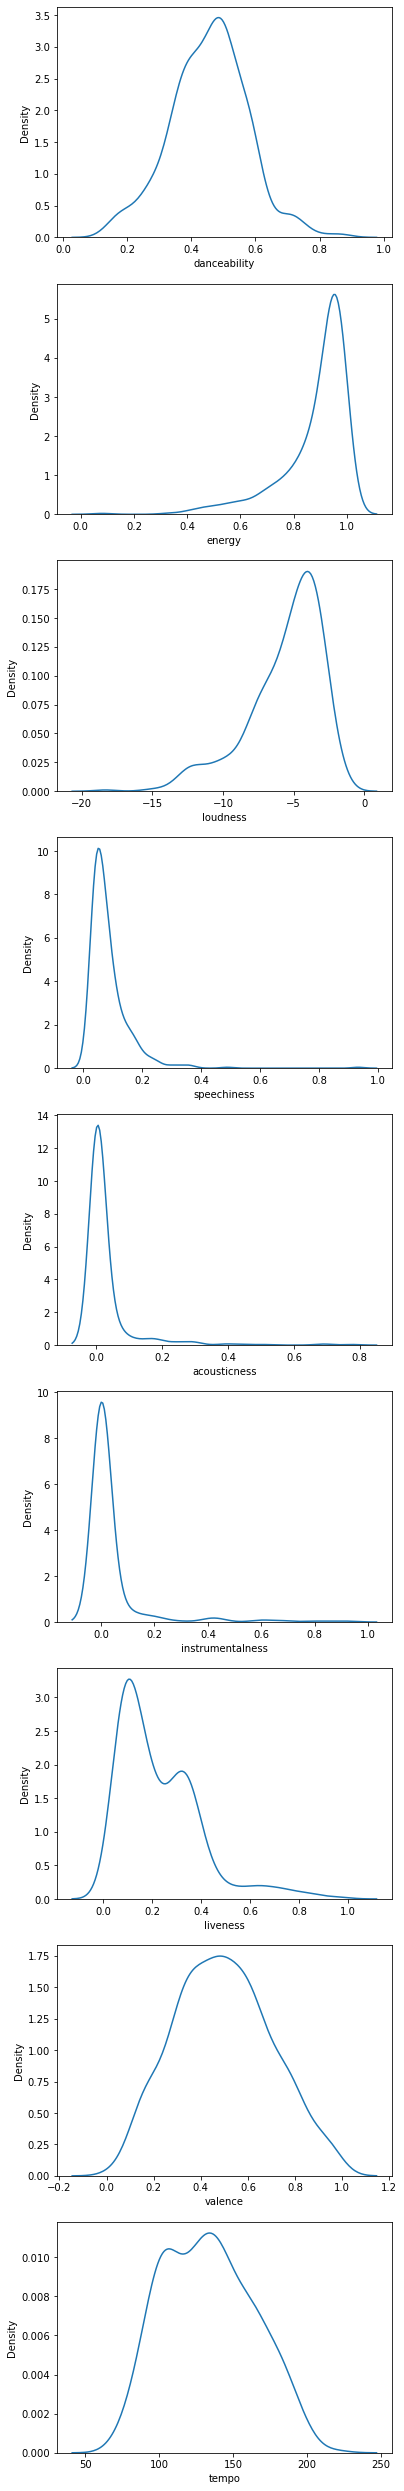

In [5]:
data = df.drop('Play Count', axis=1)

N = data.shape[1]

fig, ax = plt.subplots(nrows=N, ncols=1, figsize=(6, N*5))

for i in range(N):
    sns.kdeplot(data=data, x=data.columns[i], ax=ax[i])

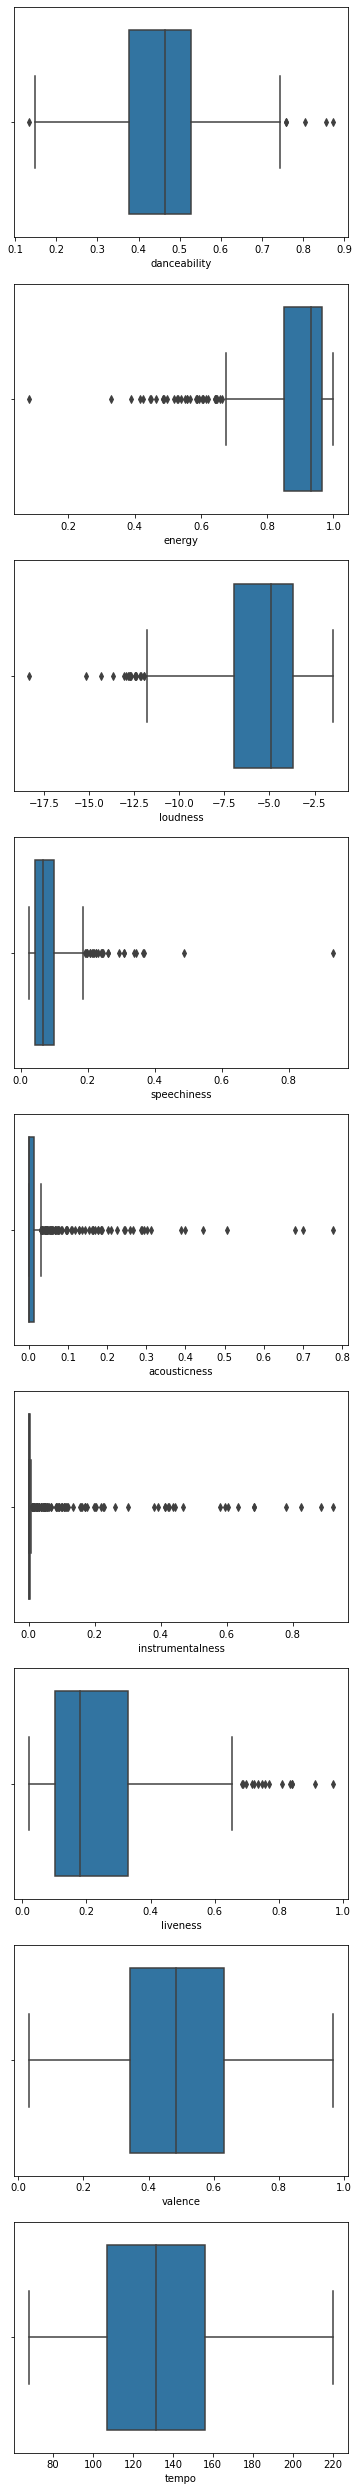

In [6]:
fig, ax = plt.subplots(nrows=N, ncols=1, figsize=(6, N*5))

for i in range(N):
    sns.boxplot(data=data, x=data.columns[i], ax=ax[i])

As the above shows, my top songs are, for the most part, have tightly distributed features. 

The speechiness, acousticness, and instrumentalness are all centered around 0 very closely. I will look into each of these further.

In [7]:
df['instrumentalness'].describe()

count    471.000000
mean       0.036730
std        0.123265
min        0.000000
25%        0.000000
50%        0.000057
75%        0.003265
max        0.923000
Name: instrumentalness, dtype: float64

As we can see, almost the 50 percentile has instrumentalness of 0.000057. With a range of 0-1, this is very low.

In [8]:
df['instrumentalness'].sort_values(ascending=False)[:20]

Song Info
X2 by Queensrÿche                                     0.923
The Man On The Silver Mountain by Stonecreep          0.887
Ride The Chariot To The Devil by Sum 41               0.826
Up Around The Bend by Creedence Clearwater Revival    0.779
The Misanthropic Principle by Strung Out              0.683
If I Die Tomorrow by Mötley Crüe                      0.682
Photograph by Def Leppard                             0.635
Alive and Well by Rise Against                        0.604
Iron Will by Skid Row                                 0.594
La Villa Strangiato by Rush                           0.580
Footstompin' Music by Grand Funk Railroad             0.467
Billy's Got A Gun by Def Leppard                      0.444
Stagefright by Def Leppard                            0.437
Just Got Paid by ZZ Top                               0.426
Master of Puppets (Remastered) by Metallica           0.421
Face Down by L.A. Guns                                0.414
241 by Reel Big Fish          

According to spotify, instrumentalness > 0.5 indicates a belief the song is an instrumental, with the closer it is to 1, the more likely. However, the only songs on this list above that are instrumentals are "La Villa Strangiato" and "Ride the Chariot to the Devil".

Additionally, some of the songs above have lyrics consistently throughout the entire song. Just looking at this sample of songs, I do not think the feature appears to be reliable, so I will not use it.

In [9]:
df['speechiness'].sort_values(ascending=False)

Song Info
Inward Singing by Tenacious D               0.9330
Pussywhipped by Steel Panther               0.4880
Six Feet Under by Like A Storm              0.3670
Here Comes Treble by The Flatliners         0.3650
Boombox by The Lonely Island                0.3450
                                             ...  
How's It Going to Be by Third Eye Blind     0.0264
The Nameless One by Volbeat                 0.0264
No, It Isn't by +44                         0.0262
Anti Establishment Man by REO Speedwagon    0.0250
Stone Cold Believer by 38 Special           0.0243
Name: speechiness, Length: 471, dtype: float64

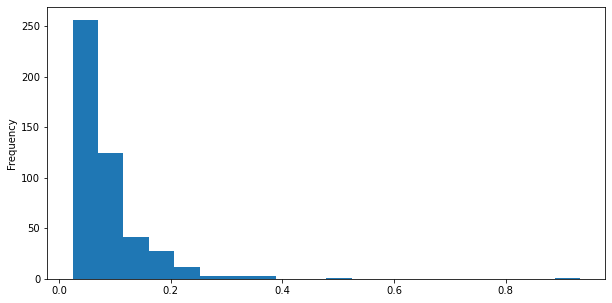

In [10]:
df['speechiness'].plot(kind='hist', bins=20, figsize=(10, 5));

In [11]:
(df['speechiness']>0.25).value_counts()

False    460
True      11
Name: speechiness, dtype: int64

As I can see, is only 11 songs with speechiness above 0.25. I will remove these.

In [12]:
df['acousticness'].sort_values(ascending=False)

Song Info
Girls by Beastie Boys                                                                  0.777000
Inward Singing by Tenacious D                                                          0.701000
We Will Rock You by Queen                                                              0.679000
Ebay (Parody of "I Want It That Way" by the Backstreet Boys) by "Weird Al" Yankovic    0.505000
The Temple Of The King by Rainbow                                                      0.445000
                                                                                         ...   
Mama Didn't Raise No Fool by Firehouse                                                 0.000008
The Man On The Silver Mountain by Stonecreep                                           0.000006
Shades of Grey by Hardcore Superstar                                                   0.000004
No Reason Why by The Offspring                                                         0.000004
The Departed by Helloween     

In [13]:
df['acousticness'].describe()

count    471.000000
mean       0.028534
std        0.084391
min        0.000004
25%        0.000231
50%        0.001530
75%        0.012200
max        0.777000
Name: acousticness, dtype: float64

<AxesSubplot:ylabel='Frequency'>

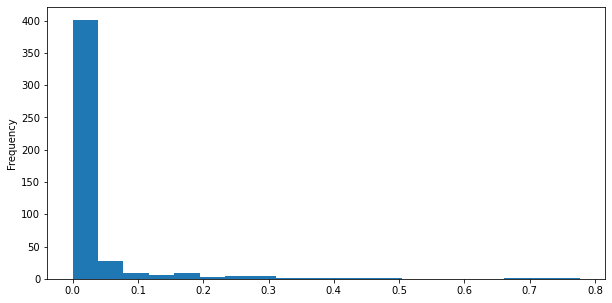

In [14]:
df['acousticness'].plot(kind='hist', bins=20, figsize=(10, 5))

In [15]:
(df['acousticness']>0.25).value_counts()

False    457
True      14
Name: acousticness, dtype: int64

As we can see, there is also only 14 songs with acousticness above 0.25. With these extreme outliers beyond this, I will remove these as well.

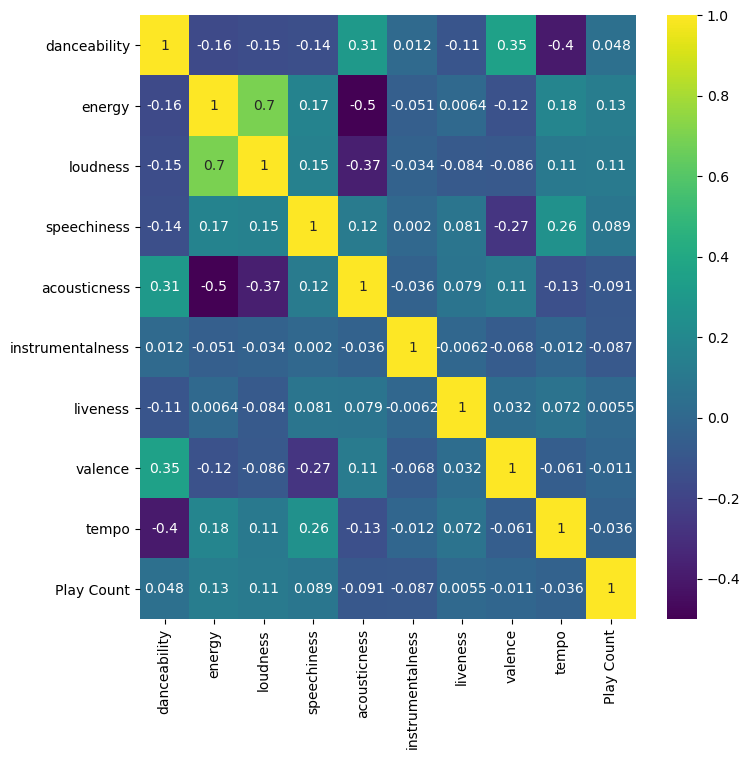

In [16]:
plt.figure(figsize=(8,8), dpi=100)

sns.heatmap(data=df.corr(), cmap='viridis', annot=True);

### Conclusions

Based on the above, I have decided to do the following:

    1) Remove the instrumentalness feature
    2) Remove all songs for training with acousticness and speechiness > 0.25

In [17]:
df[df['speechiness']<0.25]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Play Count
Song Info,,,,,,,,,,
"Bedrock Anthem by ""Weird Al"" Yankovic",0.700,0.913,-8.156,0.1510,0.059100,0.000001,0.154,0.653,93.037,31
"Canadian Idiot (Parody of ""American Idiot"" by Green Day) by ""Weird Al"" Yankovic",0.543,0.697,-9.211,0.0612,0.002060,0.000002,0.343,0.861,185.978,12
"Ebay (Parody of ""I Want It That Way"" by the Backstreet Boys) by ""Weird Al"" Yankovic",0.759,0.552,-9.536,0.0322,0.505000,0.000000,0.165,0.436,101.321,11
"Hardware Store by ""Weird Al"" Yankovic",0.707,0.867,-12.443,0.0703,0.185000,0.000338,0.329,0.684,126.138,10
155 by +44,0.462,0.936,-3.604,0.0429,0.001730,0.000037,0.373,0.546,155.017,25
...,...,...,...,...,...,...,...,...,...,...
Sirens by zebrahead,0.493,0.991,-2.901,0.0767,0.000416,0.000105,0.369,0.308,102.498,28
The Perfect Crime by zebrahead,0.328,0.974,-2.863,0.1690,0.001230,0.000000,0.300,0.334,194.198,31
Wasted Generation by zebrahead,0.370,0.982,-2.677,0.0866,0.000057,0.120000,0.240,0.672,181.047,21


In [18]:
df[df['acousticness']<0.25]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Play Count
Song Info,,,,,,,,,,
"Bedrock Anthem by ""Weird Al"" Yankovic",0.700,0.913,-8.156,0.1510,0.059100,0.000001,0.1540,0.653,93.037,31
"Canadian Idiot (Parody of ""American Idiot"" by Green Day) by ""Weird Al"" Yankovic",0.543,0.697,-9.211,0.0612,0.002060,0.000002,0.3430,0.861,185.978,12
"Hardware Store by ""Weird Al"" Yankovic",0.707,0.867,-12.443,0.0703,0.185000,0.000338,0.3290,0.684,126.138,10
155 by +44,0.462,0.936,-3.604,0.0429,0.001730,0.000037,0.3730,0.546,155.017,25
Chapter 13 by +44,0.419,0.811,-4.033,0.0325,0.001170,0.000006,0.0700,0.192,144.085,28
...,...,...,...,...,...,...,...,...,...,...
The Perfect Crime by zebrahead,0.328,0.974,-2.863,0.1690,0.001230,0.000000,0.3000,0.334,194.198,31
Wasted Generation by zebrahead,0.370,0.982,-2.677,0.0866,0.000057,0.120000,0.2400,0.672,181.047,21
We're Not Alright by zebrahead,0.522,0.971,-2.977,0.0835,0.003390,0.000000,0.3150,0.705,98.526,32


In [19]:
df_for_model = df[(df['speechiness']<0.25) & (df['acousticness']<0.25)].drop('instrumentalness', axis=1)

In [20]:
df_for_model.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,Play Count
Song Info,,,,,,,,,
"Bedrock Anthem by ""Weird Al"" Yankovic",0.700,0.913,-8.156,0.1510,0.05910,0.154,0.653,93.037,31
"Canadian Idiot (Parody of ""American Idiot"" by Green Day) by ""Weird Al"" Yankovic",0.543,0.697,-9.211,0.0612,0.00206,0.343,0.861,185.978,12
"Hardware Store by ""Weird Al"" Yankovic",0.707,0.867,-12.443,0.0703,0.18500,0.329,0.684,126.138,10
155 by +44,0.462,0.936,-3.604,0.0429,0.00173,0.373,0.546,155.017,25
Chapter 13 by +44,0.419,0.811,-4.033,0.0325,0.00117,0.070,0.192,144.085,28


In [21]:
df_for_model.shape

(447, 9)

In [22]:
df_for_model.to_csv('SongDataForModel.csv')